In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from random import randrange
from sklearn.metrics import accuracy_score
import random 
from sklearn.ensemble import AdaBoostClassifier

# Dataset

In [ ]:
rs = 0
X, y = make_circles(300, noise=0.1, random_state=rs)
trX, teX, trY, teY = train_test_split(X, y, test_size=0.33,
random_state=rs)

#  Decision Tree

In [ ]:
estimator = DecisionTreeClassifier(random_state=rs)
estimator.fit(trX, trY)
predY = estimator.predict(teX)
dtAccuracy = accuracy_score(teY, predY)

In [ ]:
def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  plt.title(title)
  plt.show()

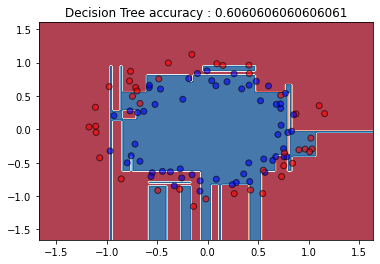

In [ ]:
plotEstimator(trX, trY, teX, teY, estimator, f'Decision Tree accuracy : {dtAccuracy}')

# Bagging

In [ ]:
# Create a random subsample from the dataset with replacement
def subsample(trX, trY,s):
  x = list()
  y = list()
  n_sample = len(trX)
  random.seed(s)
  while len(x) < n_sample:
    index = randrange(len(trX))
    x.append(trX[index])
    y.append(trY[index])
  return x,y

In [ ]:
#Applying bagging with decision tree
def bagging(trX, trY, teX, teY,n_Est):
  estimator = DecisionTreeClassifier(random_state=rs)
  es = []
  #train trees with diffrent random samples
  for i in range(0,nEst):
    x,y = subsample(trX, trY,i)
    model = clone(estimator).fit(x, y)
    y_pred = model.predict(teX)
    es.append(y_pred)
  dt_pred = pd.DataFrame(es)
  final_pred = []
  #Apply hard voting 
  for i in range(0,len(dt_pred.columns)):
    c = Counter(dt_pred[i]).most_common(1)[0][0]
    final_pred.append(c)
  return final_pred

In [ ]:
def plot_bagging(trX, trY, teX, teY,n_Est,title):
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = bagging(trX, trY, np.c_[xx.ravel(), yy.ravel()], teY,n_Est)
  Z = np.asarray(Z).reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  plt.title(title)
  plt.show()

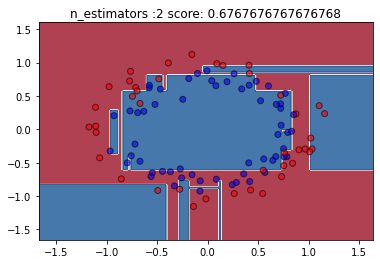

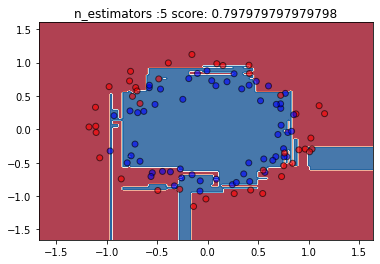

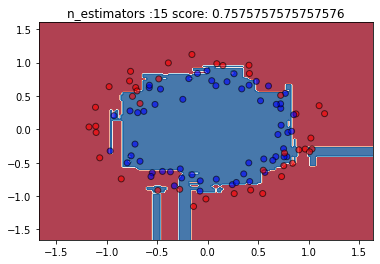

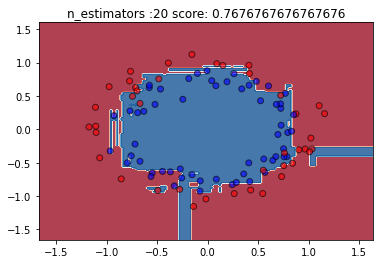

In [ ]:
for nEst in [2,5,15,20]:
  pred = bagging(trX, trY, teX, teY,nEst)
  accuracy = accuracy_score(teY, pred)
  title = f'n_estimators :{nEst} score: {accuracy_score(teY, pred)}'
  plot_bagging(trX, trY, teX, teY,nEst,title)

**Explain why bagging can reduce the variance and mitigate
the overfitting problem**
- because in bagging many models are trained over random samples with replacement from the original sample, then majority voting is from the prediction of trees so it reduces the model from overfitting to the sample.

# Boosting


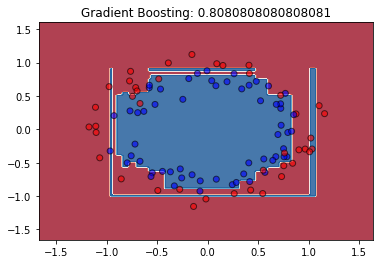

In [ ]:
estimator = AdaBoostClassifier(random_state=rs)
score = estimator.fit(trX, trY).score(teX, teY)
plotEstimator(trX, trY, teX, teY, estimator, f'Gradient Boosting: {score}')

In [ ]:
def plotBooster(trX, trY, teX, teY, estimator,ax, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = teX[:, 0].min() - .5, teX[:, 0].max() + .5
  y_min, y_max = teX[:, 1].min() - .5, teX[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  ax.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  ax.set_title( title)

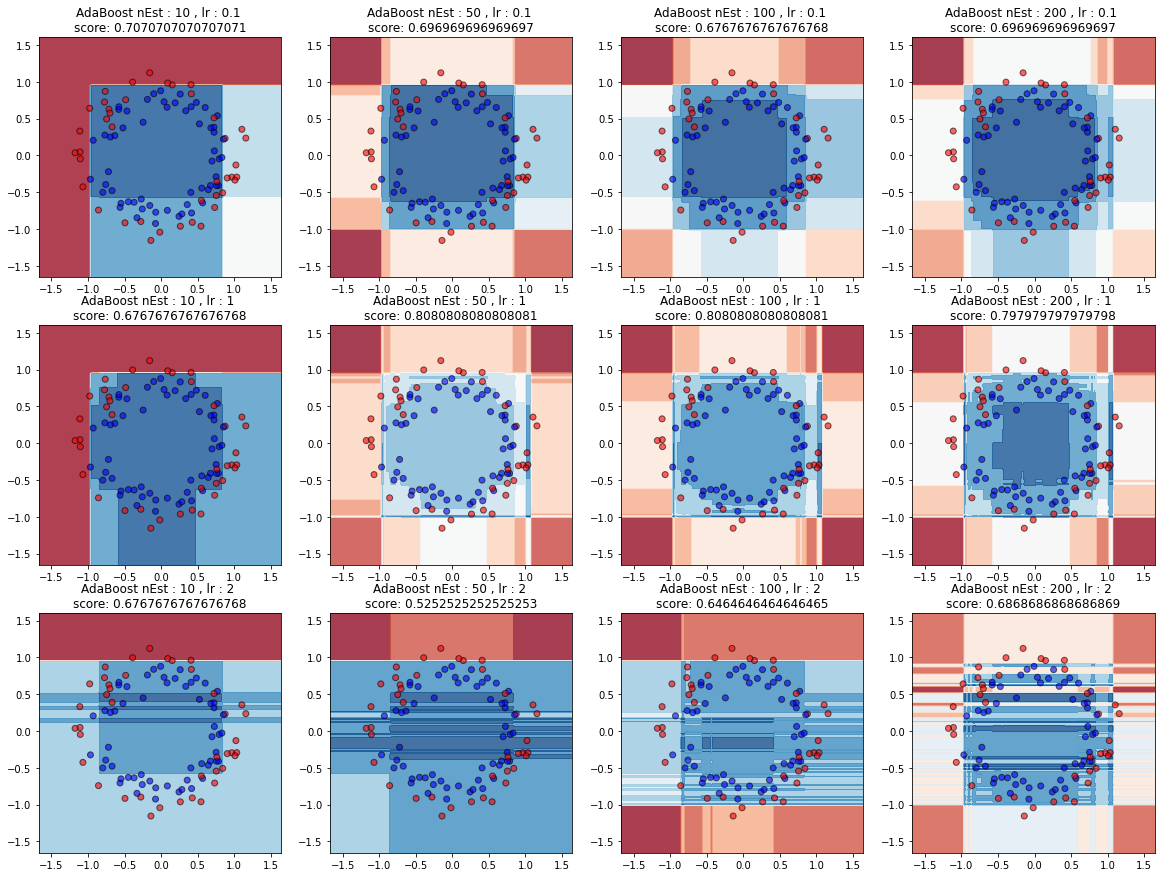

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3,figsize=(20, 15))

for lr,i in zip([0.1,1,2],range(0,3)):
  for ne,j in zip([10,50,100,200],range(0,4)):
    estimator = AdaBoostClassifier(n_estimators=ne,learning_rate=lr, random_state=rs)
    score = estimator.fit(trX, trY).score(teX, teY)
    plotBooster(trX, trY, teX, teY, estimator,axs[i, j], f'AdaBoost nEst : {ne} , lr : {lr} \nscore: {score}')